In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Orange Juice Data:**
This problem involves the `OJ` dataset. The data contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. A number of characteristics of the customer and product are recorded. The dataset consists of 1070 observations on the following 18 variables:

`Purchase`: A factor with levels CH and MM indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice  
`WeekofPurchase`: Week of purchase  
`StoreID`: Store ID  
`PriceCH`: Price charged for CH  
`PriceMM`: Price charged for MM  
`DiscCH`: Discount offered for CH  
`DiscMM`: Discount offered for MM  
`SpecialCH`: Indicator of special on CH  
`SpecialMM`: Indicator of special on MM  
`LoyalCH`: Customer brand loyalty for CH  
`SalePriceMM`: Sale price for MM  
`SalePriceCH`: Sale price for CH  
`PriceDiff`: Sale price of MM less sale price of CH  
`Store7`: A factor with levels No and Yes indicating whether the sale is at Store 7  
`PctDiscMM`: Percentage discount for MM  
`PctDiscCH`: Percentage discount for CH  
`ListPriceDiff`: List price of MM less list price of CH  
`STORE`: Which of 5 possible stores the sale occured at

Read dataset and get overall insight on the data

In [15]:
OJ = pd.read_csv('https://uu-sml.github.io/course-sml-public/data/oj.csv')
OJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

Handle qualitative data (i.e., object data type)

In [16]:
OJ = pd.get_dummies(OJ, columns=['Store7'])

Create a training dataset containing a random sample of 800 observations, and a test dataset containing the remaining observations.

In [17]:
trainIndex = np.random.choice(OJ.shape[0], size=800, replace=False)
train_dataset = OJ.iloc[trainIndex]
test_dataset = OJ.iloc[~OJ.index.isin(trainIndex)]

Split datasets into features and label dataframes

In [18]:
train_x, train_y = train_dataset.drop(columns=['Purchase']), train_dataset['Purchase']
test_x, test_y = test_dataset.drop(columns=['Purchase']), test_dataset['Purchase']

Learn a classification tree from the training data using the function `sklearn.tree.DecisionTreeClassifier()`, with
`Purchase` as the output and the other variables as inputs. Don't forget to handle qulitative variables correctly. To avoid severe overfit, you have to add some constraints to the tree, using, e.g., a maximum depth of 2 (`max_depth=2`).

In [19]:
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2)

Visualize the tree and interpret the result.

In [20]:
print(export_text(tree_classifier))

|--- feature_8 <= 0.50
|   |--- feature_8 <= 0.28
|   |   |--- class: MM
|   |--- feature_8 >  0.28
|   |   |--- class: MM
|--- feature_8 >  0.50
|   |--- feature_8 <= 0.71
|   |   |--- class: CH
|   |--- feature_8 >  0.71
|   |   |--- class: CH



Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

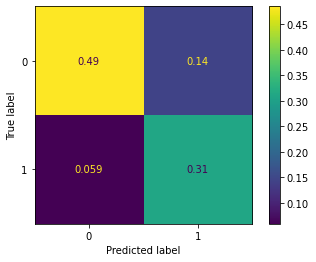

In [23]:
predictions = tree_classifier.predict(test_x)
cm = confusion_matrix(y_true=test_y, y_pred=predictions, normalize='all')
cm = ConfusionMatrixDisplay(cm)
cm.plot()